## Simulation at finite temperature

This tutorial demonstrates the use of the `UHH_ThetaEvolver` for simulations at finite temperature (based on the example mif file published as part of the relevant OOMMF extension).

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as mc

We define the system object and specify the temperature 60K.

In [2]:
system = mm.System(name='thetaevolve', T=60)

The simulation is done on a square geometry. The magnetisation is initialised uniformly pointing in x direction.

In [3]:
mesh = df.Mesh(p1=(0,0,0), p2=(1e-7,1e-7,1e-9), cell=(1e-9,1e-9,1e-9))
system.m = df.Field(mesh, dim=3, value=(1,0,0), norm=1700e3)

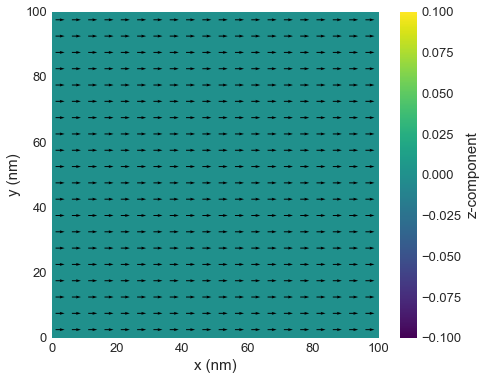

In [4]:
system.m.plane('z', n=(20,20)).mpl()

In [5]:
system.dynamics = mm.Damping(alpha=0.1) + mm.Precession(gamma0=mm.consts.gamma0)
system.dynamics

Damping(alpha=0.1) + Precession(gamma0=221276.14872118403)

We must explicitely specify the correct evolver and specify the timestep. For more details on how to specify this timestep as well as other available options please refer to the official documentation of the OOMMF extension available at http://www.nanoscience.de/group_r/stm-spstm/projects/temperature/download.shtml.

In [6]:
evolver = mc.UHH_ThetaEvolver(fixed_timestep=2e-13)

We can now use the previously defined evolver as input for the time driver.

In [7]:
td = mc.TimeDriver(evolver=evolver)

We drive the system for 0.5 ns and store the output in 50 steps.

In [8]:
td.drive(system, t=5e-10, n=50)

Running OOMMF (ExeOOMMFRunner) [2021/06/08 16:52]... (5.9 s)


We can now plot the magnetisation after time driving.

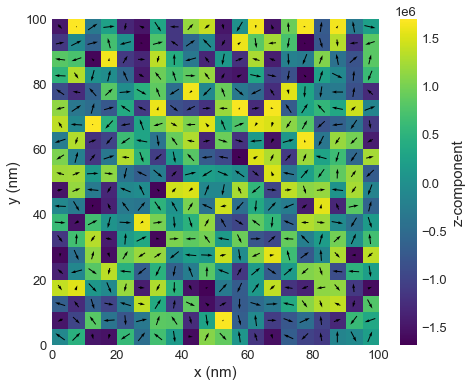

In [9]:
system.m.plane('z', n=(20, 20)).mpl()

Information about the individual steps is available from the table object.

In [10]:
system.table.data.head()

,E,ThetaEvolve:evolver:Energy calc count,max_dmdt,dE/dt,delta_E,T,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,0.0,51.0,68871.265081,0.0,0.0,60.0,50.0,50.0,0.0,0.842372,-0.002361,0.003408,2.000000e-13,1.000000e-11
1,0.0,102.0,69924.226300,0.0,0.0,60.0,101.0,50.0,1.0,0.710945,-0.001004,-0.001404,2.000000e-13,2.000000e-11
2,0.0,153.0,78886.820644,0.0,0.0,60.0,152.0,50.0,2.0,0.600855,-0.002175,-0.005869,2.000000e-13,3.000000e-11
3,0.0,204.0,67798.361453,0.0,0.0,60.0,203.0,50.0,3.0,0.502902,-0.003426,-0.002623,2.000000e-13,4.000000e-11
4,0.0,255.0,75905.774117,0.0,0.0,60.0,254.0,50.0,4.0,0.425940,-0.003645,-0.007141,2.000000e-13,5.000000e-11


We can plot the average magnetisation as a function of time.

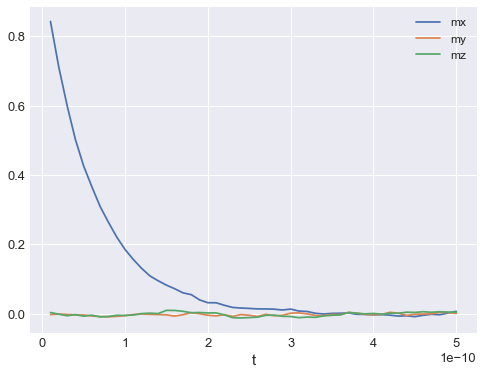

In [11]:
system.table.data.plot(x='t', y=['mx', 'my', 'mz'], grid=True);